## <center><font color='Blue'>Analysis of Healthcare Dataset Using EDA </font></center>


# Table of Contents :
- 1. Introduction
- 2. Importing Required Libraries
- 3. Data Exploration
    - Feature/column Description
    - Missing Value Detection    
    - Important Observations
- 4. Exploratory Data Analysis (EDA)
    - Univariate Analysis on Each and Every column or feature
    - Bivariate Analysis    
- 5. EndNote

## Introduction

>**This Project is about the complete *Exploratory Data Analysis* on a Healthcare Insurance company's data set. This analysis has been done to find some insights to estimate the average medical care expences based on the trends in the population segments and to give some benificiary recommendations based on the insights found.**

## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import plotly_express as px
import seaborn as sns


## Data Exploration

> ### Feature Description:
    1. age: age of primary beneficiary
    2. sex: insurance contractor gender, female, male
    3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,   objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
    4. children: Number of dependents
    5. smoker: Smoking
    6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
    7. charges: Individual medical costs billed by health insurance


In [3]:
## Impoting/read the data

healthcare_df = pd.read_csv(r"C:\Users\91998\OneDrive\Assignments\Healthcare Case Study\Data\insurance.csv")
healthcare_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Knowing the data properties using some functions and methods

In [4]:
## The size of the data we use shape method
healthcare_df.shape

(1338, 7)

In [5]:
## Knowing column names using columns method
healthcare_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
## To know the knowledge of data that we have, we will use info() function
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Getting all the unique values in each feature
features = healthcare_df.columns
for feature in features:
    print(f"{feature} ---> {healthcare_df[feature].nunique()}")

age ---> 47
sex ---> 2
bmi ---> 548
children ---> 6
smoker ---> 2
region ---> 4
charges ---> 1337


In [8]:

## Detection of Missing Values
healthcare_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Important Observations:

- By seeing the above values we can conclude that this dataset doesn't have missing values.
- All column names and datatypes are correct.
- The size of the data is (1337 * 7). 
- We have 4 numerical and 3 categorical features in this data.

# Exploratory Data Analysis


## Numerical Features
### Univariate Analysis on Age 

In [9]:
## Non Vizual Analysis on age feature
print(healthcare_df["age"].min())
print(healthcare_df["age"].max())
print(healthcare_df["age"].mean())
print(healthcare_df["age"].median())
print(healthcare_df["age"].std())

18
64
39.20702541106129
39.0
14.049960379216172


### Important Observations
- The average age and median are almost looking equal. So it might be a normally distributed.
- There may not be outliers in this column.

<AxesSubplot:>

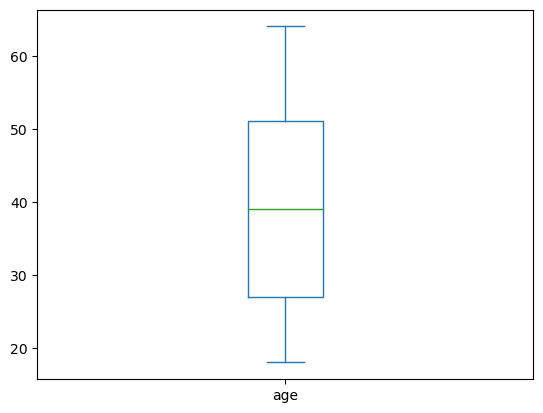

In [10]:
## Vizual Analysis on age feature
## Box plot for outlier detection
healthcare_df["age"].plot(kind="box")

### Observation:
- As we expected we don't find any outliers in the age.
- The absence of outliers in the age column provides confidence in the data quality, facilitates more accurate analysis.

<AxesSubplot:ylabel='Density'>

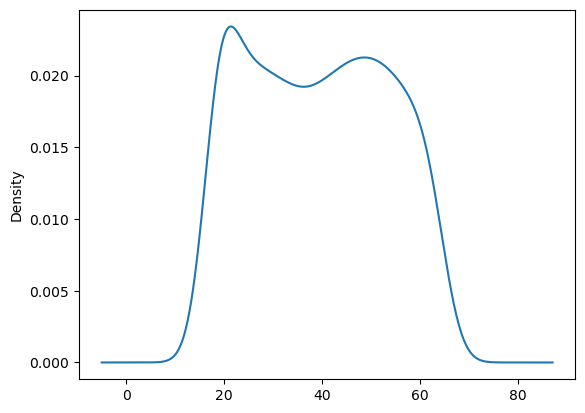

In [11]:
## Kde plot to know the distribution of age feature
healthcare_df["age"].plot(kind = "kde")

### Observation:
- we can see that every age group has almost same distribution. But it is not normally distributed. It's almost looking symmetric but having some discrepencies in the peek of the bell shaped curve.


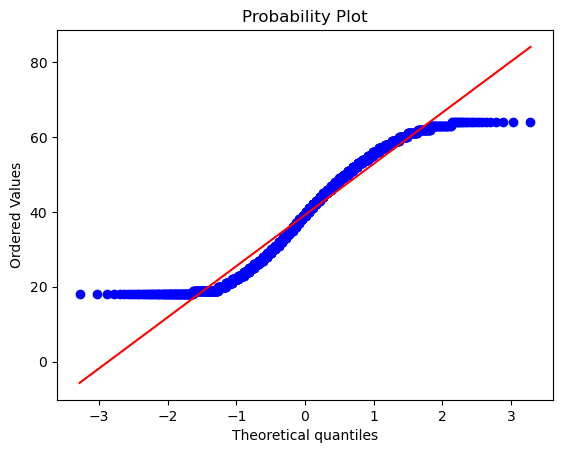

In [12]:
## Checking For Normal Distribution on age feature
stats.probplot(healthcare_df["age"],dist="norm",plot=plt)
plt.show()

### Observation:
- Most of the data points are not lie on the line. So it is not normally distributed.

### Univariate Analysis on bmi

In [13]:
## Non Vizual Analysis on bmi feature
print(healthcare_df["bmi"].min())
print(healthcare_df["bmi"].max())
print(healthcare_df["bmi"].mean())
print(healthcare_df["bmi"].median())
print(healthcare_df["bmi"].std())

15.96
53.13
30.663396860986538
30.4
6.098186911679017


### Imortant Observations
- The mean and median of bmi are almost looking equal. This might be a normally distributed feature.
- There may not be outliers in this column.

<AxesSubplot:>

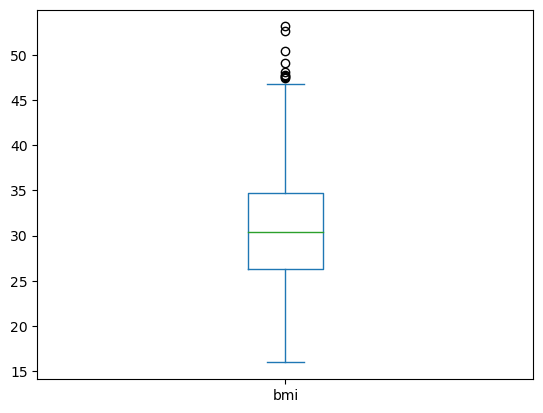

In [14]:
## Vizual Analysis on bmi feature
## to detect outliers in bmi feature
healthcare_df["bmi"].plot(kind="box")

### Observations: This feature has outliers. May be the patients with high bmi are fit and healthy or may be they are athlets with healthy condition those who has less medical expences with high bmi. 

<AxesSubplot:ylabel='Density'>

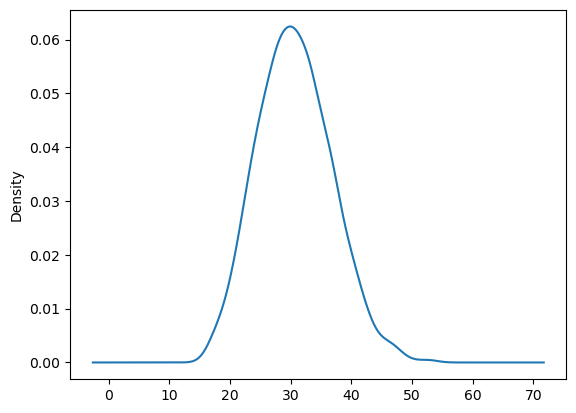

In [15]:
## Distribution plot on bmi
healthcare_df["bmi"].plot(kind="kde")

** This graph idcates that it is normally distributed. And also we can Indentify symmetricity in the bell shaped curve.**

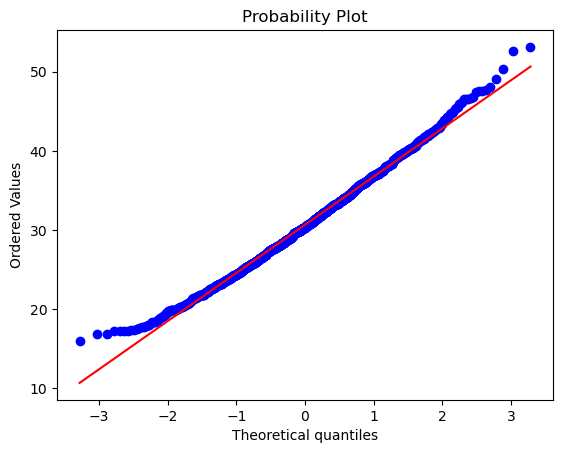

In [16]:
## Checking for Normal distribution
stats.probplot(healthcare_df["bmi"],dist="norm",plot=plt)
plt.show()



### Outlier Treatment on bmi feature

In [17]:
### outlier treatment

bmi_q1 = healthcare_df["bmi"].quantile(0.25)
bmi_q3 = healthcare_df["bmi"].quantile(0.75)
IQR = bmi_q3 - bmi_q1
bmi_lower_bound = bmi_q1 - 1.5 * IQR
bmi_upper_bound = bmi_q3 + 1.5 * IQR

In [18]:
cleaned_healthcare_df = healthcare_df[(healthcare_df["bmi"] > bmi_lower_bound) & (healthcare_df["bmi"] < bmi_upper_bound)]
print(cleaned_healthcare_df.shape)
print(healthcare_df.shape)

(1329, 7)
(1338, 7)


<AxesSubplot:>

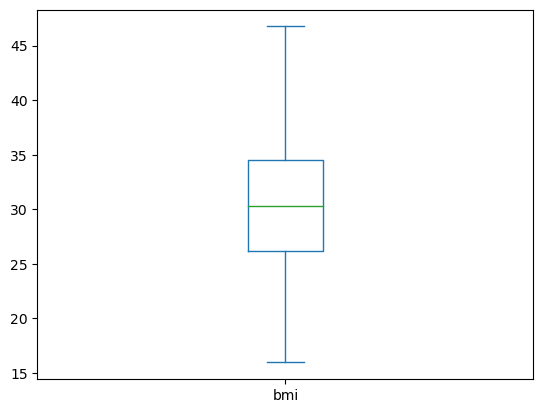

In [19]:
## checking outliers on cleaned data
cleaned_healthcare_df["bmi"].plot(kind="box")

### Observation:
- No outliers found after treating the outliers by 1.5 IQR.

<AxesSubplot:ylabel='Density'>

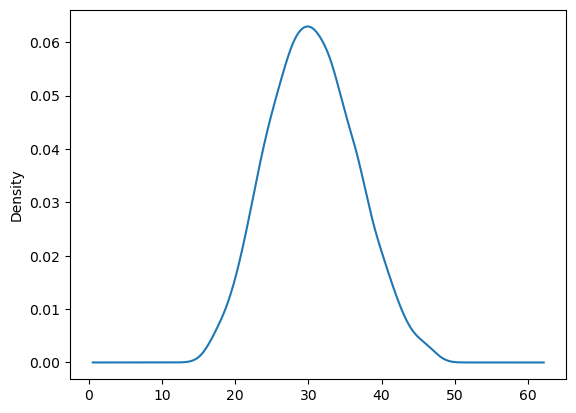

In [20]:
## Distribution plot on bmi
cleaned_healthcare_df["bmi"].plot(kind="kde")

### Observation:
- This curve is looking almost symmetric.
- The distribution might be normally distribted.

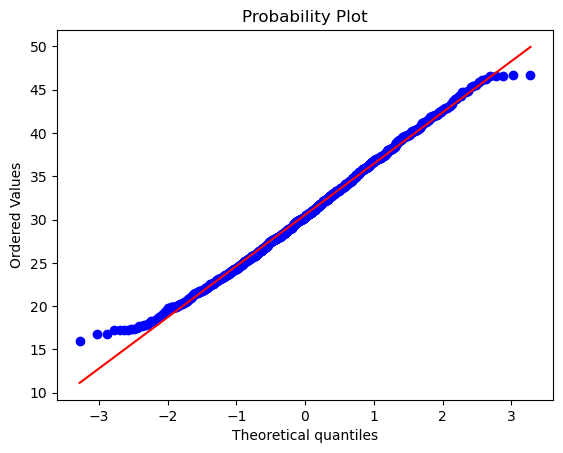

In [21]:
### Checking for normal distribution
stats.probplot(cleaned_healthcare_df["bmi"],dist="norm",plot=plt)
plt.show()

** This signifies that bmi feature is almost normally distributed except few points.

### Univariate Analysis on children 

In [25]:
## Non-Vizual Analysis on children feature

print(cleaned_healthcare_df["children"].min())
print(cleaned_healthcare_df["children"].max())
print(cleaned_healthcare_df["children"].mean())
print(cleaned_healthcare_df["children"].median())
print(cleaned_healthcare_df["children"].std())


0
5
1.0963130173062452
1.0
1.2079281069603962


### Observation


<AxesSubplot:>

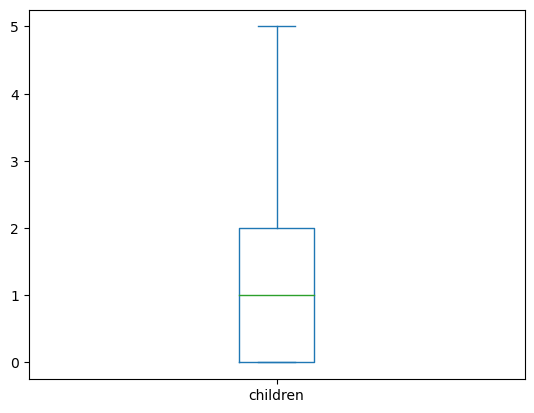

In [23]:
## Vizual Analysis on children column
## Outlier detection using boxplot
cleaned_healthcare_df["children"].plot(kind="box")

### Observation:
- We do not have any out liers in children feature.

<AxesSubplot:ylabel='Density'>

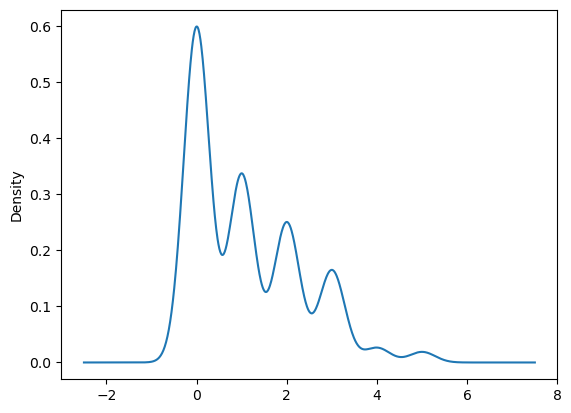

In [27]:
cleaned_healthcare_df["children"].plot(kind="kde")

### This distribution has 4 modes , so children feature has multimodel distribution.

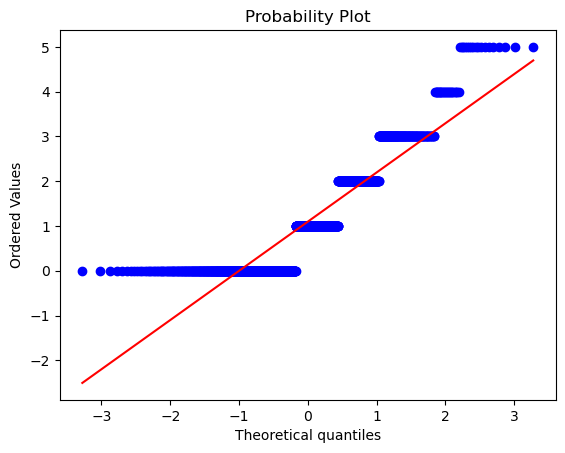

In [24]:
## Cheking for normal distribution
stats.probplot(cleaned_healthcare_df["children"],dist="norm",plot=plt)
plt.show()

### Observation:
- There is no normal distribution in children feature. Even there is no symmetricity in this featrure's distribution. we could not find valid information from this feature.

### Univariate Analysis on charges 

In [28]:
print(cleaned_healthcare_df.shape)

(1329, 7)


In [17]:
## Non-Vizual Analysis on charges feature
## Non Vizual Analysis on charges feature
print(cleaned_healthcare_df["charges"].min())
print(cleaned_healthcare_df["charges"].max())
print(cleaned_healthcare_df["charges"].mean())
print(cleaned_healthcare_df["charges"].median())
print(cleaned_healthcare_df["charges"].std())

1121.8739
62592.87309
13212.333374378486
9361.3268
11997.236429208284


## Observation:
**In charges feature mean and median far away to each other, so there might be a possiblity of outliers in this feature.**

<AxesSubplot:>

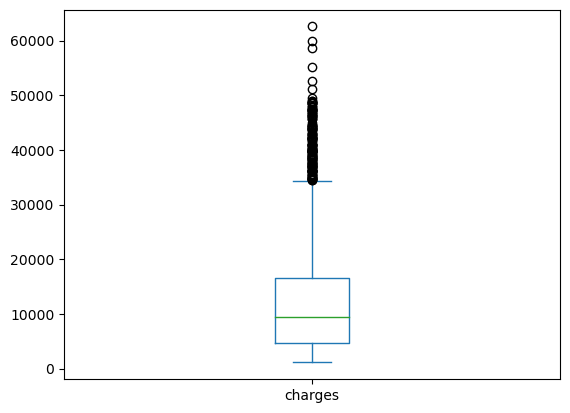

In [30]:
## Vizual Analysis on charges
## outlier ditection using boxplot
cleaned_healthcare_df["charges"].plot(kind="box")

**As we expected in nonvizual anlysis in the above graph we detect some outliers.**

<AxesSubplot:ylabel='Density'>

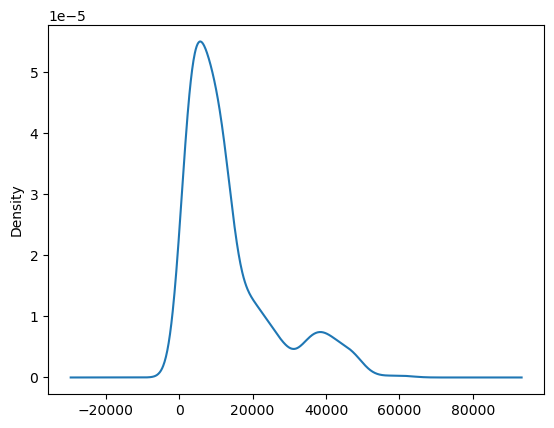

In [31]:
## distribution plot on charges feature
cleaned_healthcare_df["charges"].plot(kind = "kde")


### By seeing this graph we can say that  this feature has pareto distribution. To move this graph to right we can use Boxcox Transformation.

((array([-3.27870689, -3.01957648, -2.8753529 , ...,  2.8753529 ,
          3.01957648,  3.27870689]),
  array([ 1121.8739 ,  1131.5066 ,  1135.9407 , ..., 58571.07448,
         60021.39897, 62592.87309])),
 (10861.545689412253, 13212.333374378484, 0.9037177013929751))

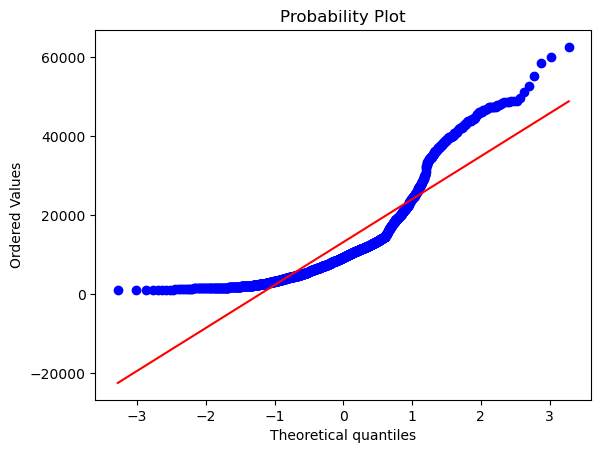

In [32]:
stats.probplot(cleaned_healthcare_df["charges"],dist="norm",plot=plt)

**As above mentioned it is not normally distributed and It is pareto distribution.**

### Outlier treatment on charges feature

In [153]:
## Outlier Treatment On Charges 
charges_q1 = cleaned_healthcare_df["charges"].quantile(0.25)
charges_q3 = cleaned_healthcare_df["charges"].quantile(0.75)
IQR = charges_q3 - charges_q1
charges_lower_bound = charges_q1 - 1.5 * IQR
charges_upper_bound = charges_q3 + 1.5 * IQR


In [148]:
cleaned_healthcare_df1 = cleaned_healthcare_df[(cleaned_healthcare_df["charges"] > charges_lower_bound) & (cleaned_healthcare_df["charges"] < charges_upper_boundary)]
print(cleaned_healthcare_df.shape)
print(healthcare_df.shape)

(1078, 7)
(1338, 7)


### Observation:
- The outliers are treated by 1.5IQR but we are losing around 300 data points. 

<AxesSubplot:>

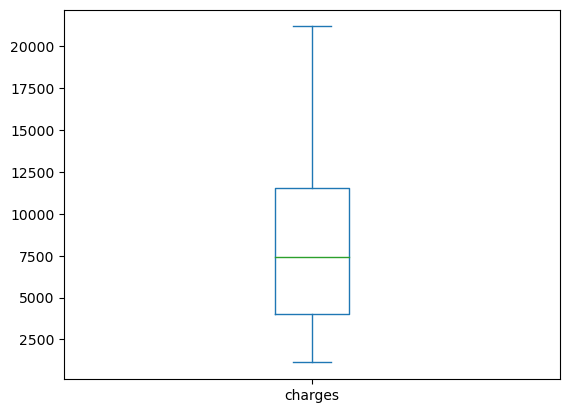

In [154]:
cleaned_healthcare_df1["charges"].plot(kind="box")

<AxesSubplot:ylabel='Density'>

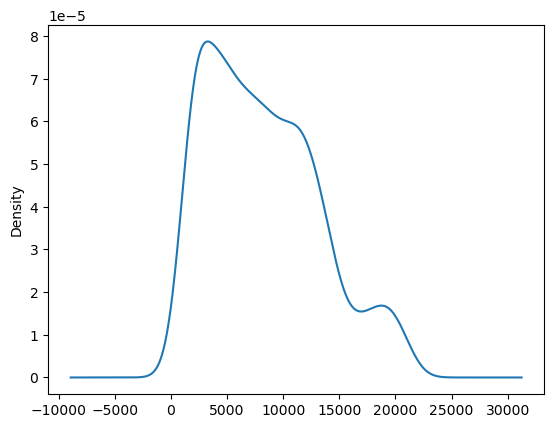

In [155]:
cleaned_healthcare_df1["charges"].plot(kind="kde")

### Observation:
- As we removed out liers using 1.5IQR we are still getting pareto distribution it seems. So istead of going for IQR treatment we can transform the data by using boxcox transform so that the distribution can be changed to normal.

### Boxcox Transformation on charges feature

In [177]:
cleaned_healthcare_df["charges"] ,l = stats.boxcox(cleaned_healthcare_df["charges"])
print(l)

0.9892198378273752


<AxesSubplot:>

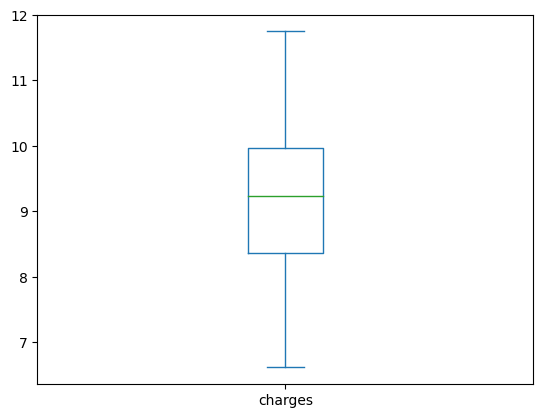

In [175]:
cleaned_healthcare_df["charges"].plot(kind="box")

<AxesSubplot:ylabel='Density'>

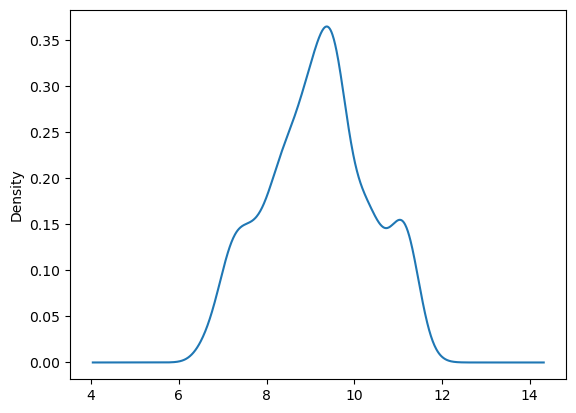

In [176]:
cleaned_healthcare_df["charges"].plot(kind="kde")

### Observation :
- We are getting almost symmetric distribution after boxcox transformation. It might be normally distributed now. But the Values are changed. 

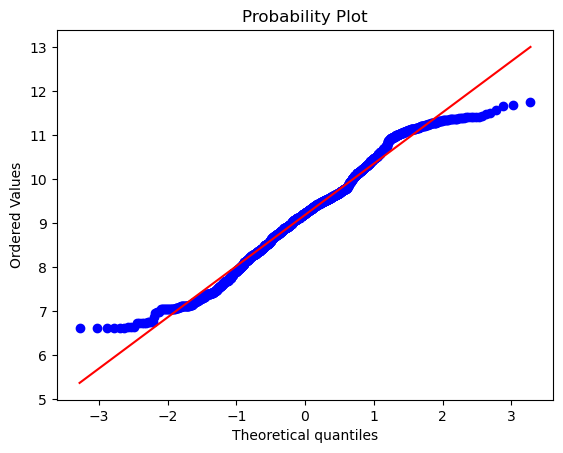

In [174]:
stats.probplot(cleaned_healthcare_df["charges"],dist="norm",plot=plt)
plt.show()

##  As our target variable is charges we will keep the outliers as it is and do the bivariate analysis.

# Categorical columns


### Univariate Analysis on sex feature

In [187]:
### Non Vizual Analysiss on Sex feature
cleaned_healthcare_df["sex"].value_counts(normalize=True)

male      0.504138
female    0.495862
Name: sex, dtype: float64

<AxesSubplot:>

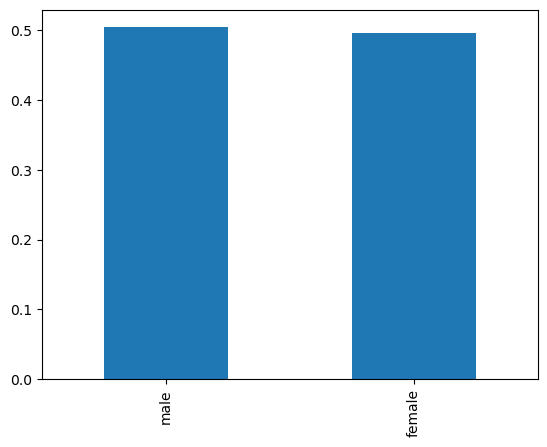

In [188]:
### Vizual Analysis on sex feature using bar plot
cleaned_healthcare_df["sex"].value_counts(normalize=True).plot(kind="bar")

### Observation:
- Almost male and female persons are having same medical expences.

### Univariate Analysis on smoking 

In [185]:
### Non vizual Analysis on Smoking feature
cleaned_healthcare_df["smoker"].value_counts(normalize=True)

no     0.796087
yes    0.203913
Name: smoker, dtype: float64

<AxesSubplot:>

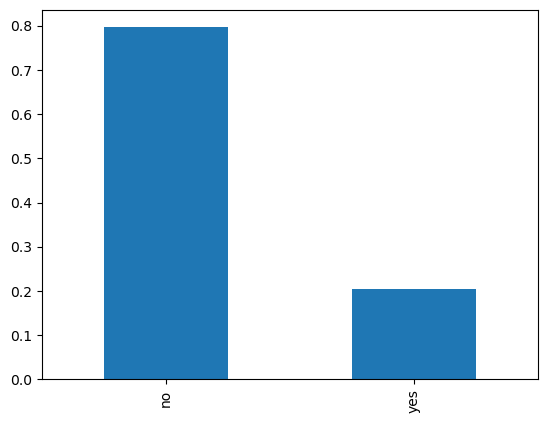

In [186]:
### vizual Analysis on Smoking feature
cleaned_healthcare_df["smoker"].value_counts(normalize=True).plot(kind="bar")

### Obserrvattion:
- Count Non smokers are more who have medical expence than count of smokers who have medical expences.

### Univariate Analysis on region 

In [189]:
## Non Vizual Analysis on region feature
cleaned_healthcare_df["region"].value_counts(normalize=True)


southeast    0.268623
northwest    0.244545
southwest    0.243792
northeast    0.243040
Name: region, dtype: float64

<AxesSubplot:>

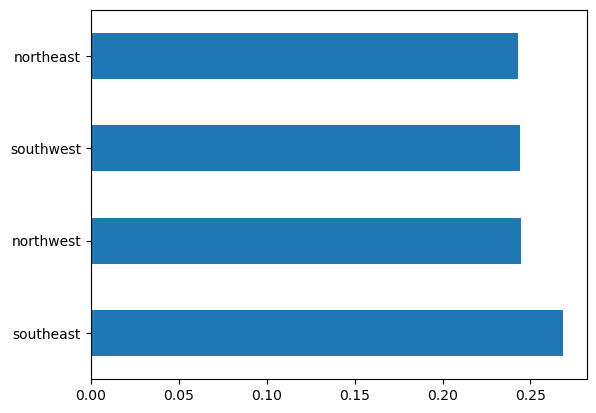

In [192]:
##Vizual Analysis on region feature
cleaned_healthcare_df["region"].value_counts(normalize=True).plot(kind="barh")

### Observation:
- Count of Southeast region People are more who have the medical Expences than the other three regions.
- Count of people from northeast, southwest,northwest Regions are almost eaqual those who have medical expences. 

## Numerical vs Numerical
### Bivariate Analysis on "age" and "charges"

In [195]:
### Nonvizual Analysis on Numerical columns

cleaned_healthcare_df[["age", "bmi", "children", "charges"]].corr()


,age,bmi,children,charges
age,1.000000,0.114686,0.043041,0.522203
bmi,0.114686,1.000000,0.017355,0.136118
children,0.043041,0.017355,1.000000,0.157866
charges,0.522203,0.136118,0.157866,1.000000


### Observation:
- age and charges are having positive relation relation.
- Positive correlation: If the correlation value is close to 1, it indicates a strong positive correlation. Here "age" and "charges" have a correlation value of 0.522, indicating a moderate positive correlation. "bmi" and "charges" have a correlation 0.136 , indicating moderate positive correlation.
- No correlation: If the correlation value is close to 0, it suggests no linear relationship between the two features. The "children" and "bmi" have a correlation value of 0.017, indicating no significant correlation.

<AxesSubplot:xlabel='age', ylabel='charges'>

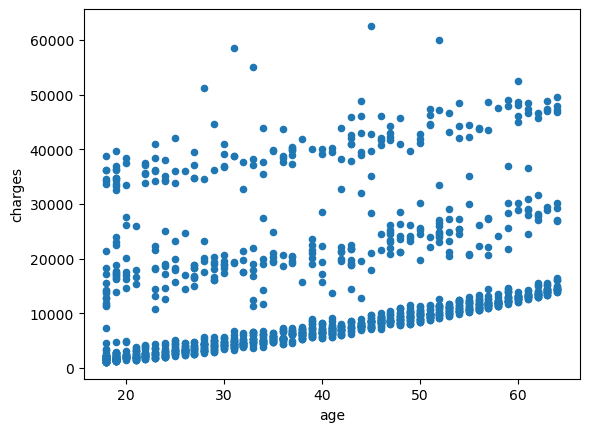

In [44]:
## Vizual Analysis on age And Charges
cleaned_healthcare_df.plot(kind="scatter",x="age",y="charges")

### Observation:
- ### "age" and "charges" features have positive relation ship.
- ### As age is increasing Medical expences also increasing. And also Those who have less age also have the medical expences. they might be with higher bmi or smokers.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

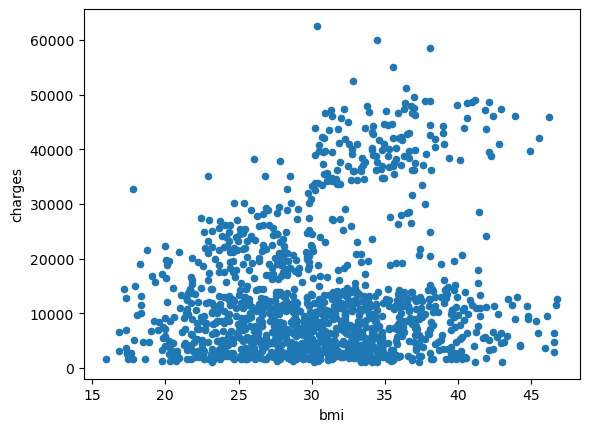

In [45]:
## Vizual Analysis on age And Charges
cleaned_healthcare_df.plot(kind="scatter",x="bmi",y="charges")

### Observation
- ### Bmi has increased the medical expences are also increased in the ranges from 20 to 45.
- ### If Bmi is high and medical expences are less for the patients might be athlets who has fit health condition with that bmi.

<AxesSubplot:xlabel='children', ylabel='charges'>

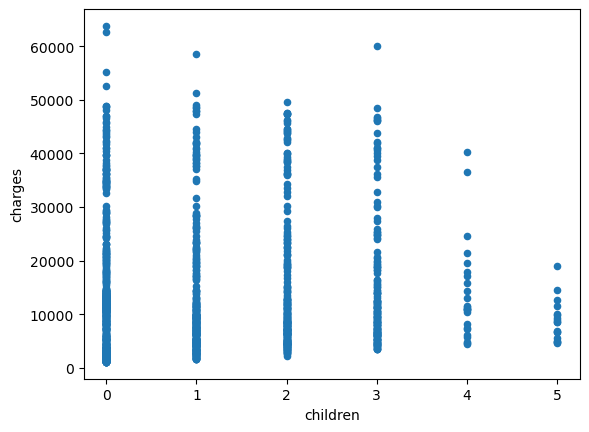

In [201]:
## Vizual Analysis on age And Charges
healthcare_df.plot(kind="scatter",x="children",y="charges")

### Observation:
- ### "children" feature doesnot impacts much on "charges". Because the people who doesn't have children are spending more medical expences than those who have more children.


## Numerical Vs Categorical

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

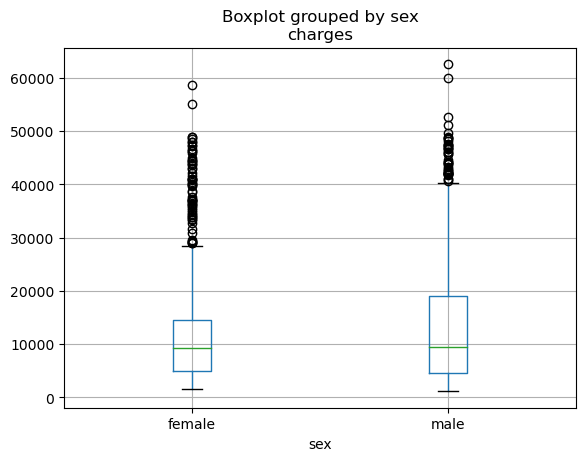

In [46]:
# Visual Analysis on sex Vs charges
cleaned_healthcare_df.boxplot(by="sex",column="charges")

### Observation:
- we can compare the minimum and maximum charges of male and females and the number of oultiers which are high in females when     compared to males  which indicates that the medical costs of  few females is high compared to other females and finally the     medical expenses of females is higher compared to the medical expenses of males

- They can Introduce new strategies to fix premium for female members of health insurance.

### Bivariate Analysis on smoker  Vs charges

<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

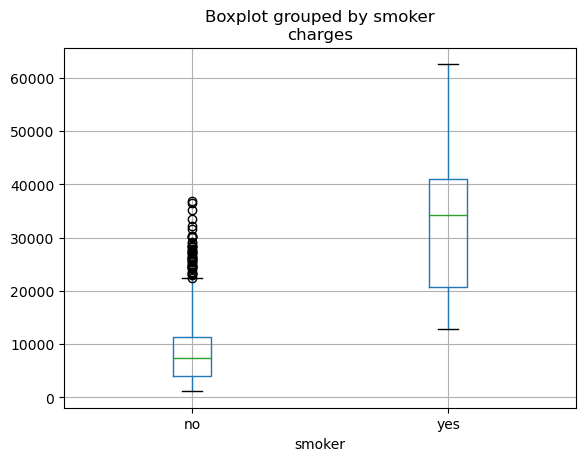

In [48]:
## Vizual Analysis on smoker vs charges features

cleaned_healthcare_df.boxplot(by="smoker",column="charges")

### Outliers:
- If we compare the minimum and maximum values of smoker and non smokers, the minimum value of the smoker is starting at almost closer to the maximum value of non smokers. By this we can estimate that smokers will have the more medical expencess that the non smokers.
- Even though the non smokers have outliere their medical charges are not that expencive comapartive to smoker expences.
- Smokers tend to have basic medical expences that are so expencive than 3/4th of non smokers never incur such expenditure.



### Bivariate on region Vs charges

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

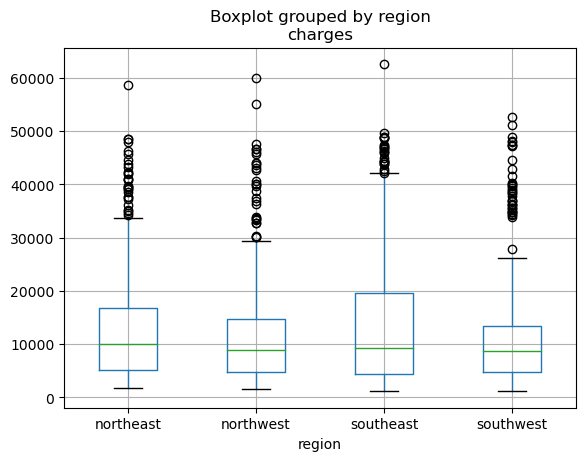

In [49]:
## Vizual Analysis on region and charges.
cleaned_healthcare_df.boxplot(by="region",column="charges")

### Observations:
- South east patients are spending more amount comparative to other three regions. If we observe the outliers also the medical expence of southeast region are very high.


### Categorical Vs Categorical

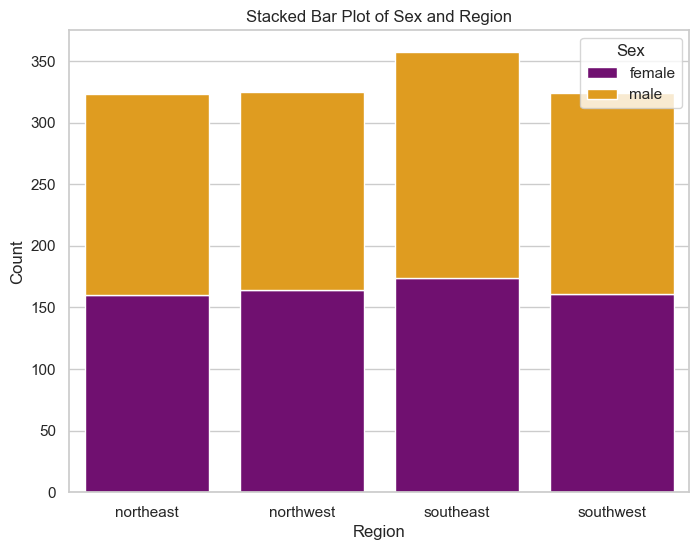

In [55]:
## Analysing the relation ship between gender and region
# Set the plot style
sns.set(style="whitegrid")

# Create a cross-tabulation of sex and region categories
cross_tab = pd.crosstab(cleaned_healthcare_df['region'], cleaned_healthcare_df['sex'])

# Plot the stacked bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cross_tab.index, y=cross_tab['female'], color='purple', label='female')
sns.barplot(x=cross_tab.index, y=cross_tab['male'], bottom=cross_tab['female'], color='orange', label='male')

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Sex and Region')

# Add a legend
plt.legend(title='Sex')

# Show the plot
plt.show()


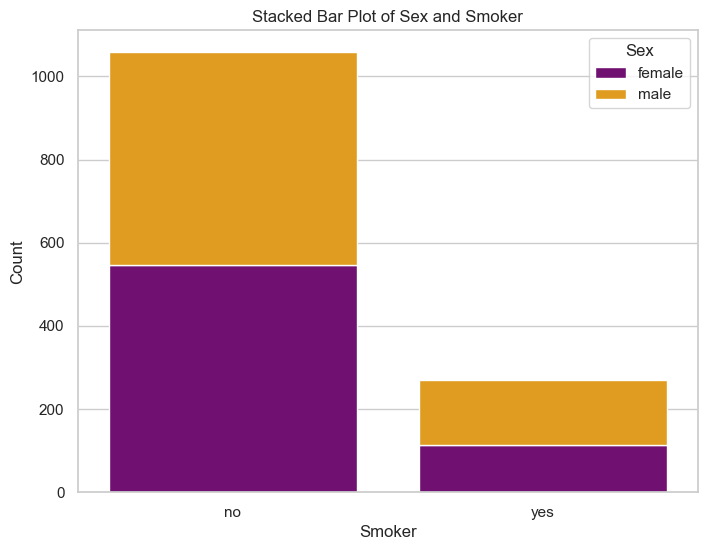

In [19]:
## Analysing the relation ship between gender and region
# Set the plot style
sns.set(style="whitegrid")

# Create a cross-tabulation of sex and region categories
cross_tab = pd.crosstab(cleaned_healthcare_df['smoker'], cleaned_healthcare_df['sex'])

# Plot the stacked bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cross_tab.index, y=cross_tab['female'], color='purple', label='female')
sns.barplot(x=cross_tab.index, y=cross_tab['male'], bottom=cross_tab['female'], color='orange', label='male')

# Set labels and title
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Sex and Smoker')

# Add a legend
plt.legend(title='Sex')

# Show the plot
plt.show()

### By observing this graph the female patient who are with higher risk are from south east region compare toother regions.

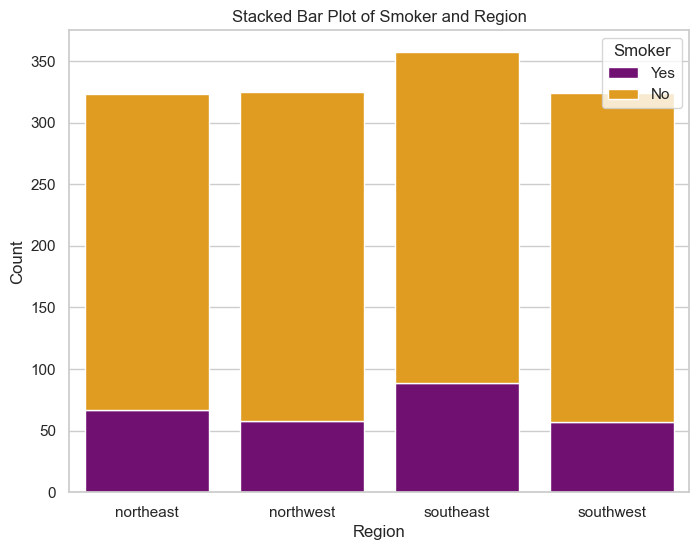

In [21]:
## Analysing the relation ship between smoker and region
# Set the plot style
sns.set(style="whitegrid")

# Create a cross-tabulation of sex and region categories
cross_tab = pd.crosstab(cleaned_healthcare_df['region'], cleaned_healthcare_df['smoker'])

# Plot the stacked bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cross_tab.index, y=cross_tab['yes'], color='purple', label='Yes')
sns.barplot(x=cross_tab.index, y=cross_tab['no'], bottom=cross_tab['yes'], color='orange', label='No')

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Smoker and Region')

# Add a legend
plt.legend(title='Smoker')

# Show the plot
plt.show()


### smokers are less in count in every region but in that count also highest count is from southeast.

### Multivariate Analysis

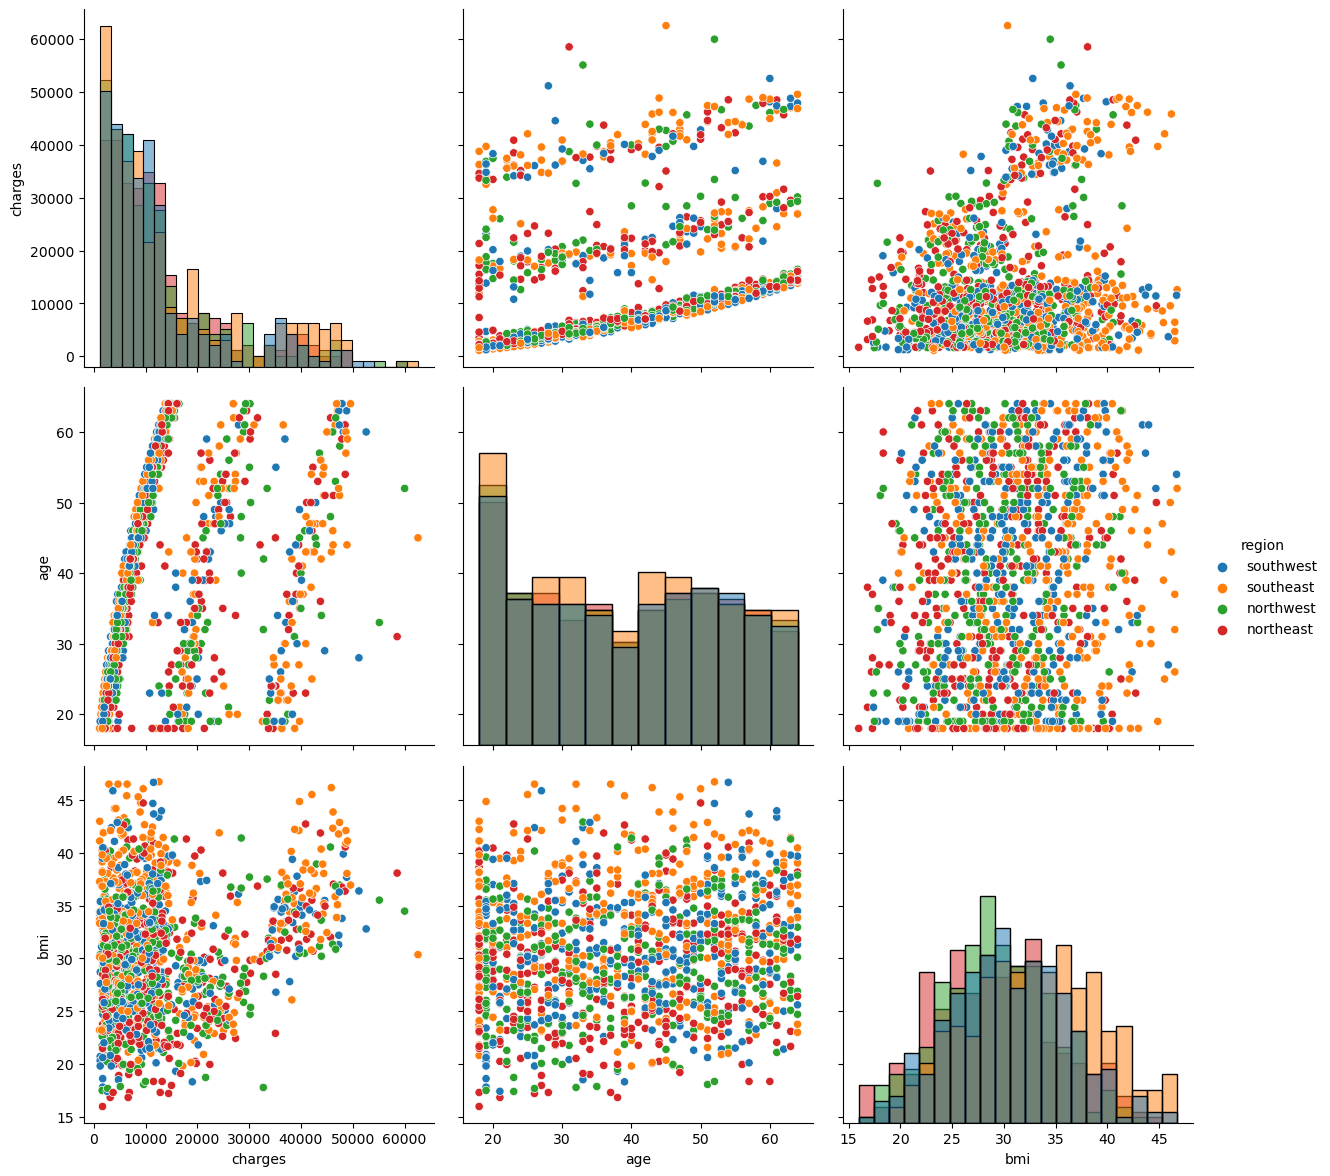

In [52]:
### Analysing the interr relation ship between age,bmi,charges and region.
g = sns.PairGrid(cleaned_healthcare_df, vars=["charges", "age", "bmi"], hue="region", height=4)
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()
plt.show()

### We can observe very strong relation beteween age and bmi and also the high age with high bmi people are from southeast region. It indicates that south east region patients have more medical expences.


<AxesSubplot:>

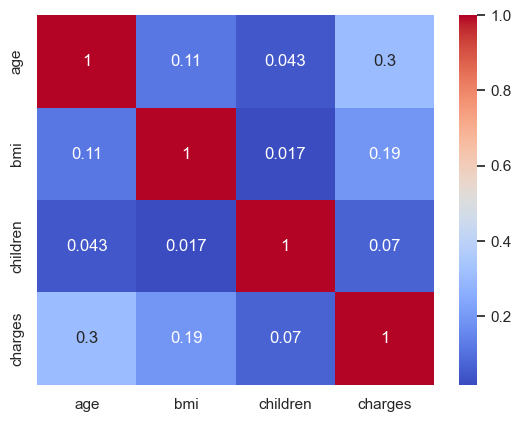

In [56]:
 # calculate the correlation matrix between numerical features
numerical_columns = [feature for feature in cleaned_healthcare_df.columns if cleaned_healthcare_df[feature].dtype !="O"]
 # feature = st.selectbox("Swlwct a feature",("emi","price","year","kilometers","mileage"))
corr_matrix = cleaned_healthcare_df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### Oservation:
- All the features have the postive relation but age has more strong realtion with charges comparative other features.

In [22]:
numerical_features = [feature for feature in healthcare_df.columns if healthcare_df[feature].dtype != 'O']
categorical_features = [feature for feature in healthcare_df.columns if healthcare_df[feature].dtype == 'O']


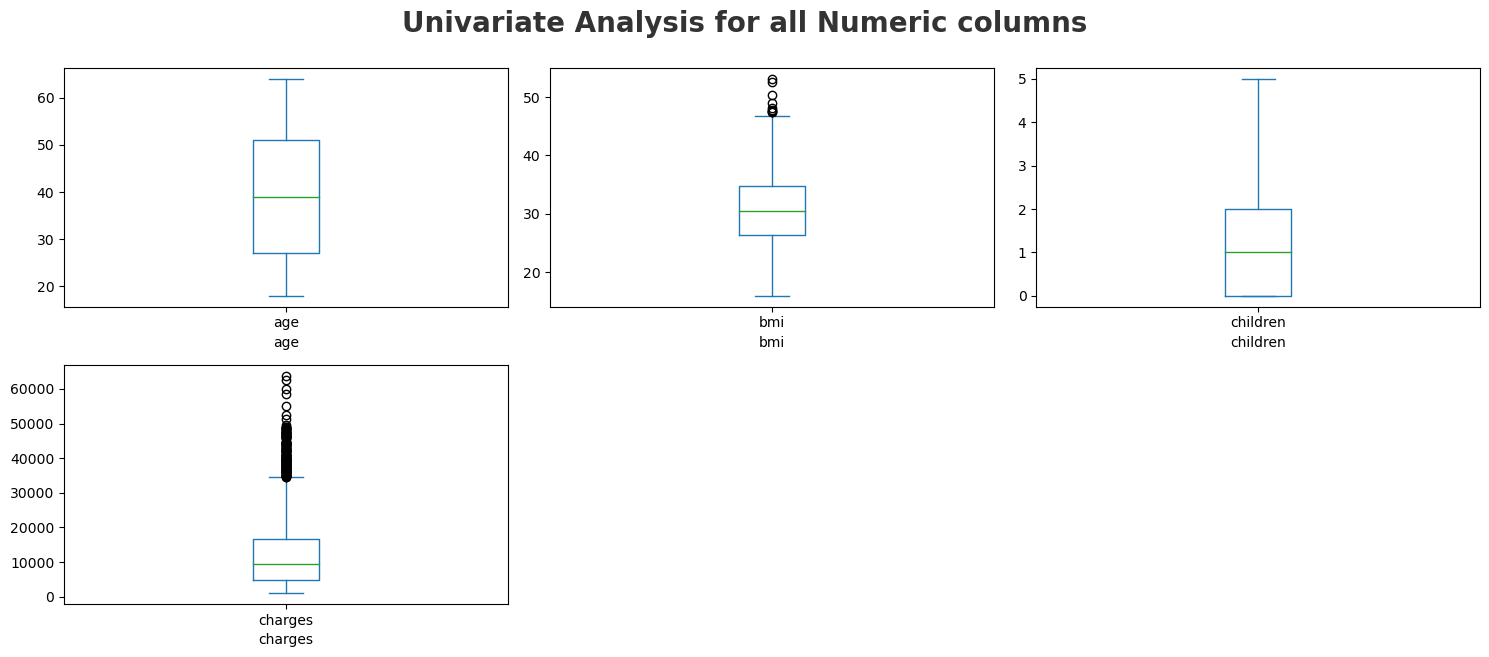

In [43]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for all Numeric columns",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
for i in range(len(numerical_features)):
    plt.subplot(5,3,i+1)
    chealthcare_df[numerical_features[i]].plot(kind="box")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

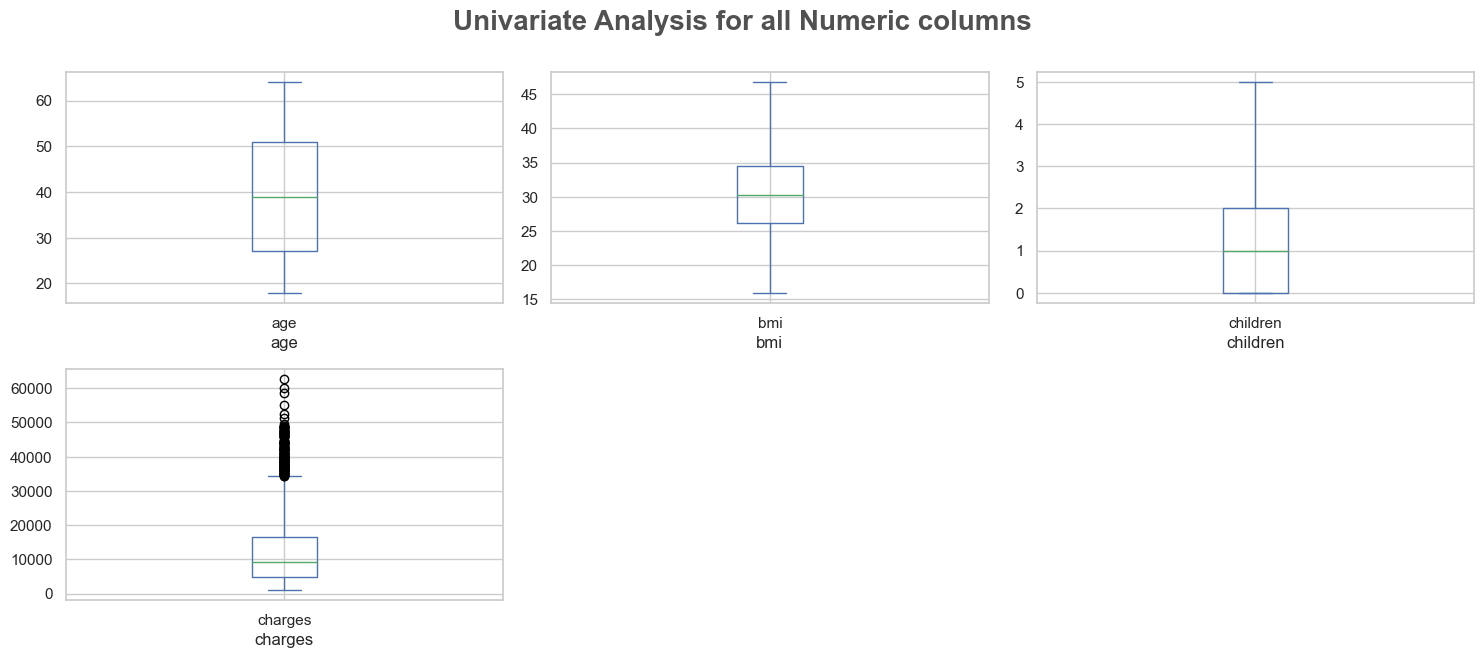

In [60]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for all Numeric columns",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
for i in range(len(numerical_features)):
    plt.subplot(5,3,i+1)
    cleaned_healthcare_df[numerical_features[i]].plot(kind="box")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

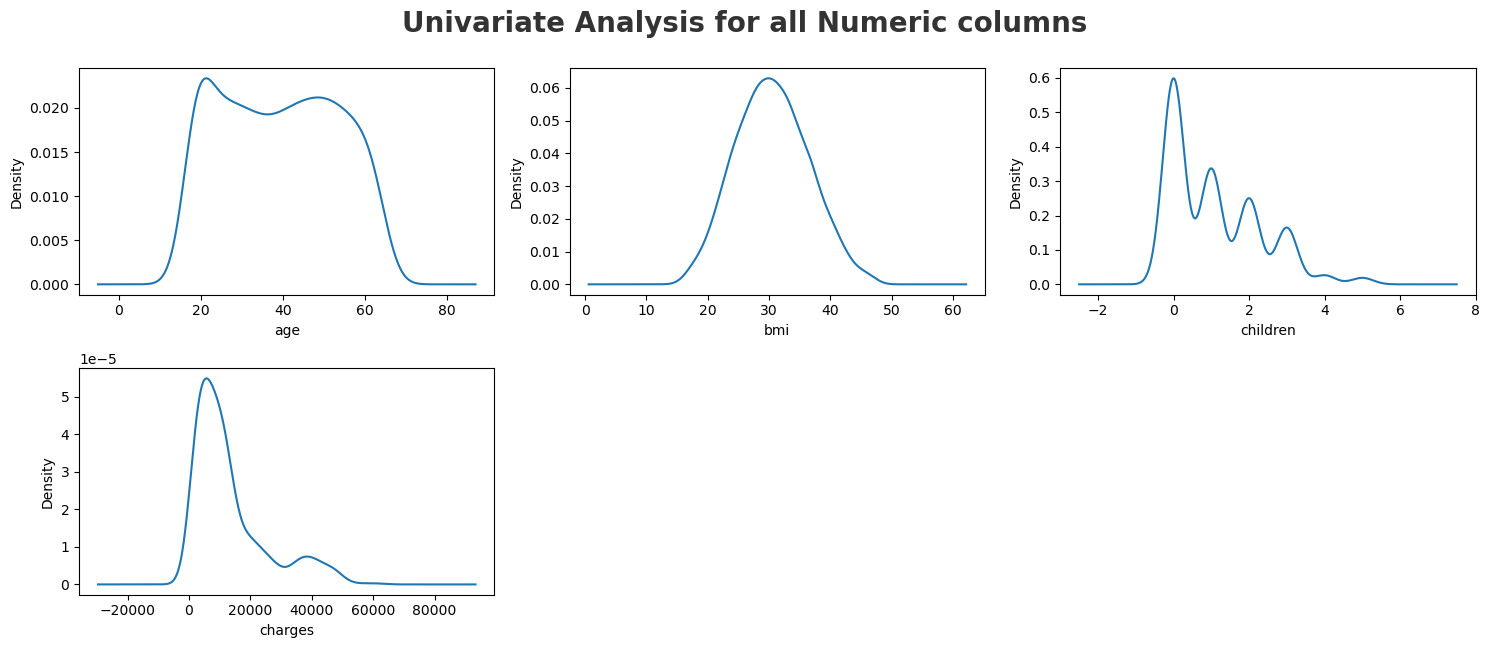

In [41]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for all Numeric columns",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
for i in range(len(numerical_features)):
    plt.subplot(5,3,i+1)
    cleaned_healthcare_df[numerical_features[i]].plot(kind="kde")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

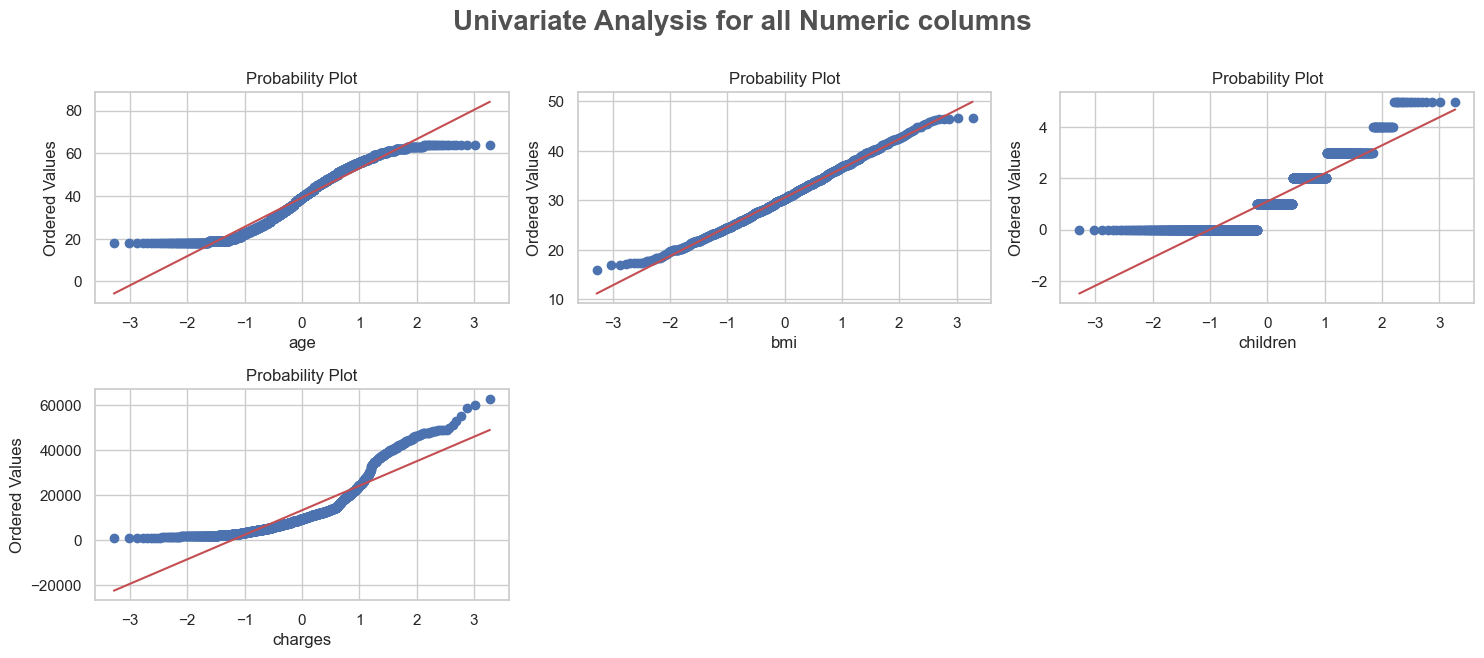

In [59]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for all Numeric columns",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
for i in range(len(numerical_features)):
    plt.subplot(5,3,i+1)
    stats.probplot(cleaned_healthcare_df[numerical_features[i]],dist="norm",plot=plt)
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

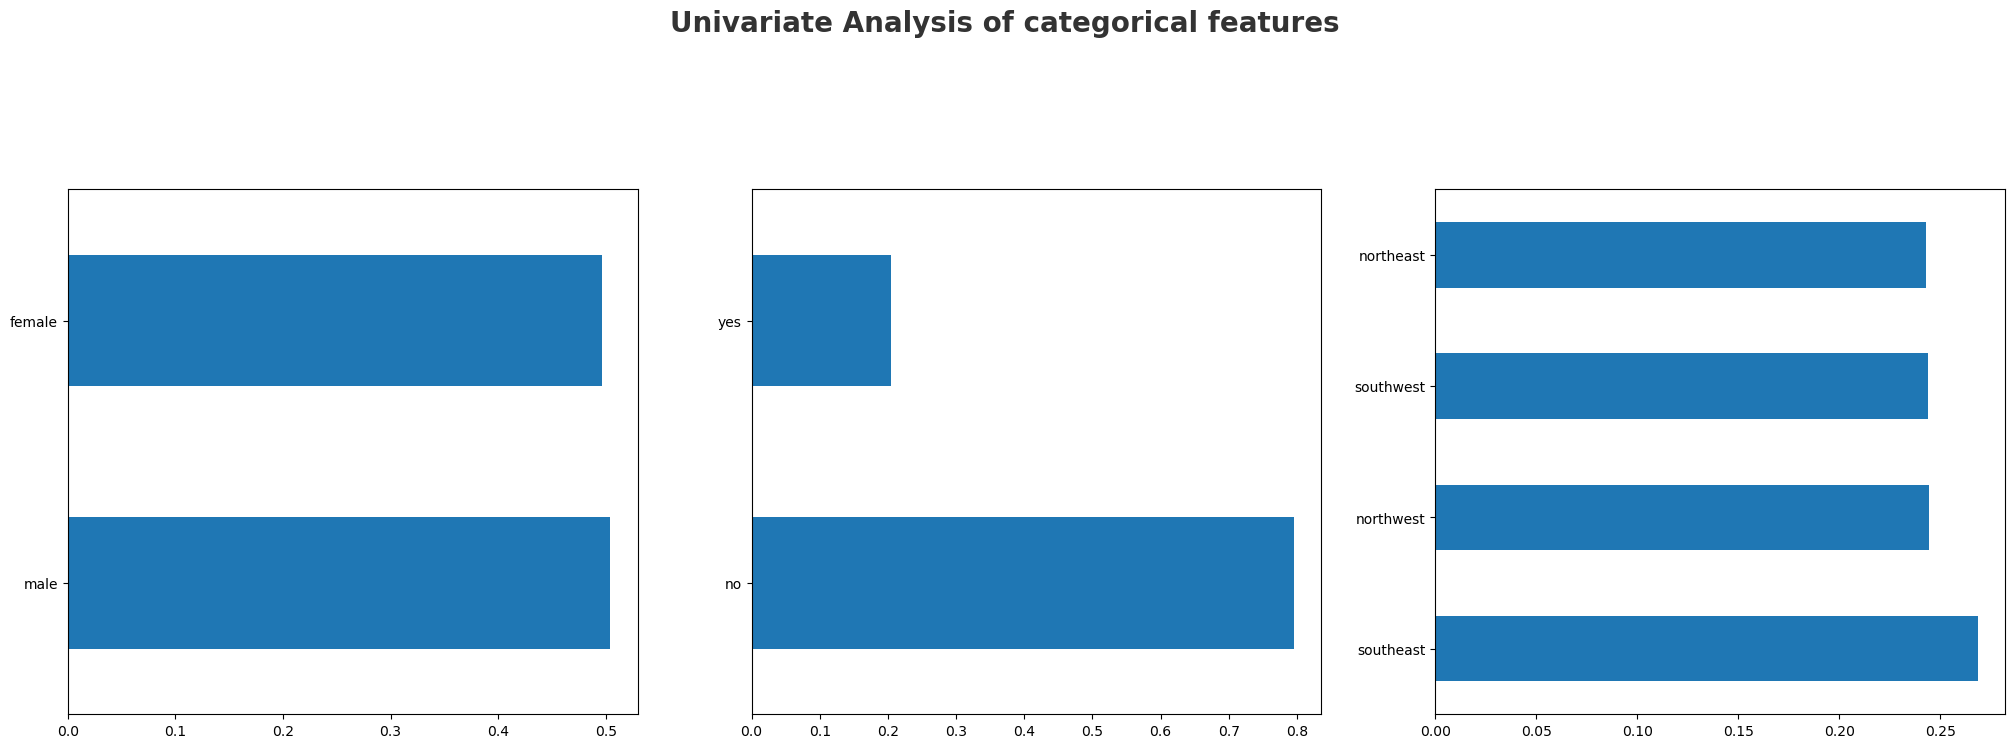

In [36]:

plt.figure(figsize=(25,15))
plt.suptitle("Univariate Analysis of categorical features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ["sex", "smoker", "region"]

for i in range(len(cat1)):
    plt.subplot(2, 3, i+1)
    cleaned_healthcare_df[cat1[i]].value_counts(normalize=True).plot(kind="barh")
    
    

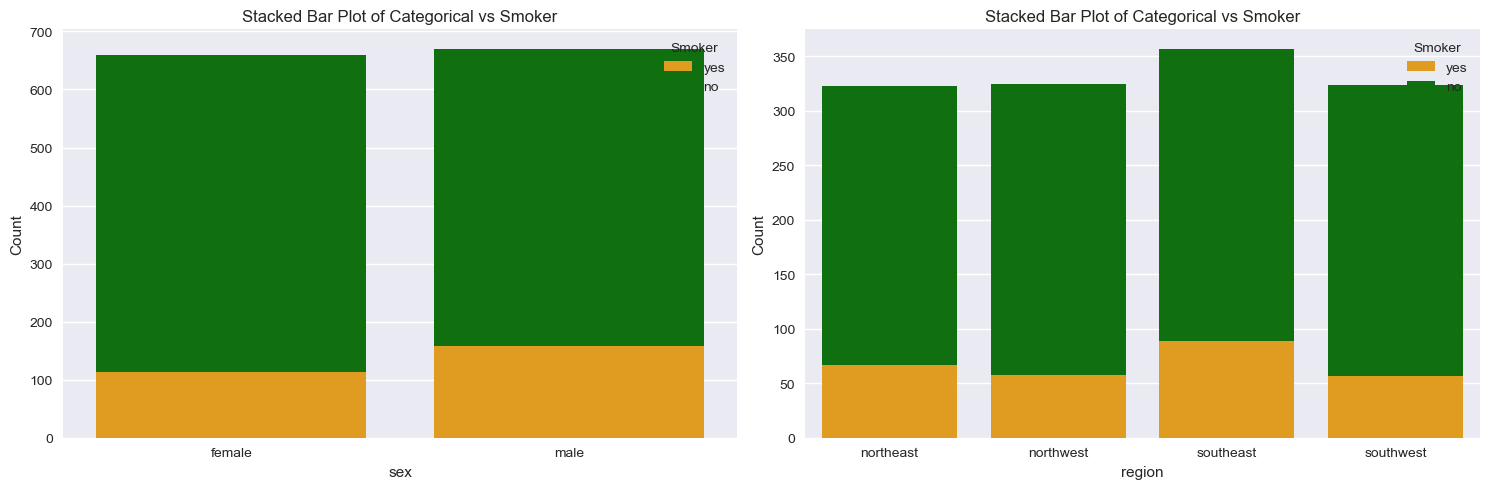

In [22]:
personal_features = ["sex", "region"]

# Set the plot style
plt.style.use('seaborn')

# Create subplots
fig, axes = plt.subplots(1, len(personal_features), figsize=(15, 5))

for i in range(len(personal_features)):
    # Create a cross-tabulation of personal feature and Churn categories
    cross_tab = pd.crosstab(cleaned_healthcare_df[personal_features[i]], cleaned_healthcare_df['smoker'])

    # Plot the stacked bar plot
    sns.barplot(x=cross_tab.index, y=cross_tab['yes'], color='orange', label='yes', ax=axes[i])
    sns.barplot(x=cross_tab.index, y=cross_tab['no'], bottom=cross_tab['yes'], color='green', label='no', ax=axes[i])

    # Set labels and title
    axes[i].set_xlabel(personal_features[i])
    axes[i].set_ylabel('Count')
    axes[i].set_title('Stacked Bar Plot of Categorical vs Smoker')
    axes[i].legend(title='Smoker')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Understanding the distribution of charges using the Pareto distribution can help policymakers, healthcare providers, and insurers analyze and manage the financial aspects of healthcare more effectively.